**Nama: Hizkia Jefren Reppi**

**NIM : 21208008**

*Dataset yang digunakan:*  
https://www.kaggle.com/datasets/chetankv/dogs-cats-images

# Klasifikasi Gambar Anjing dan Kucing

## Mengimpor Library yang Dibutuhkan

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
 99% 429M/435M [00:04<00:00, 55.3MB/s]
100% 435M/435M [00:04<00:00, 99.2MB/s]


In [ ]:
import zipfile, os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files

## Melakukan Ekstraksi pada File zip

In [ ]:
local_zip = '/content/dogs-cats-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Melakukan Splitting Data

In [ ]:
base_dir = '/content/dataset'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

## Menampilkan Kelas dari train_dir dan validation_dir

In [ ]:
print("Train Directory")
os.listdir(train_dir)

Train Directory


['cats', 'dogs']

In [ ]:
print("Validation Directory")
os.listdir(validation_dir)

Validation Directory


['cats', 'dogs']

## Preprocessing Data

In [ ]:
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  horizontal_flip=True,
  shear_range=0.2,
  zoom_range=0.2,
  validation_split=0.2,
  fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary'
)

Found 8000 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
  rescale=1.0/255
)

validation_generator = validation_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Membuat dan Menampilkan Model Summary

In [ ]:
model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dropout(0.5),
  Dense(32, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Menambahkan Optimizer

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer=tf.optimizers.Adam(),
  metrics=['accuracy']
)

## Menambahkan Fitur Callback

In [ ]:
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy')>0.9):
      print("Akurasi sudah mencapai (90%)")
      self.model.stop_training = True

callbacks = myCallback()

## Melakukan Proses Training Model

In [ ]:
num_epochs = 50
validation_steps = 5

history = model.fit(
  train_generator,
  epochs=num_epochs,
  validation_data=validation_generator,
  validation_steps=validation_steps,
  verbose=2,
  callbacks=[callbacks]
)

Epoch 1/50
250/250 - 60s - loss: 0.6940 - accuracy: 0.5217 - val_loss: 0.6927 - val_accuracy: 0.5063 - 60s/epoch - 241ms/step
Epoch 2/50
250/250 - 53s - loss: 0.6841 - accuracy: 0.5499 - val_loss: 0.6076 - val_accuracy: 0.7312 - 53s/epoch - 210ms/step
Epoch 3/50
250/250 - 52s - loss: 0.6586 - accuracy: 0.6074 - val_loss: 0.6371 - val_accuracy: 0.6687 - 52s/epoch - 209ms/step
Epoch 4/50
250/250 - 53s - loss: 0.6431 - accuracy: 0.6356 - val_loss: 0.6411 - val_accuracy: 0.6438 - 53s/epoch - 210ms/step
Epoch 5/50
250/250 - 52s - loss: 0.6226 - accuracy: 0.6532 - val_loss: 0.5814 - val_accuracy: 0.6812 - 52s/epoch - 210ms/step
Epoch 6/50
250/250 - 52s - loss: 0.5925 - accuracy: 0.6896 - val_loss: 0.5698 - val_accuracy: 0.7312 - 52s/epoch - 207ms/step
Epoch 7/50
250/250 - 53s - loss: 0.5739 - accuracy: 0.6973 - val_loss: 0.5645 - val_accuracy: 0.7000 - 53s/epoch - 211ms/step
Epoch 8/50
250/250 - 52s - loss: 0.5387 - accuracy: 0.7299 - val_loss: 0.5243 - val_accuracy: 0.7312 - 52s/epoch - 209

## Model Evaluation

In [ ]:
# Evaluate and print results for the training set
train_score = model.evaluate(train_generator)
print('Training Loss: {:.4f}'.format(train_score[0]))
print('Training Accuracy: {:.4f}'.format(train_score[1]))

print()

# Evaluate and print results for the validation set
valid_score = model.evaluate(validation_generator)
print('Validation Loss: {:.4f}'.format(valid_score[0]))
print('Validation Accuracy: {:.4f}'.format(valid_score[1]))

250/250 [==============================] - 58s 233ms/step - loss: 0.2023 - accuracy: 0.9184
Training Loss: 0.2023
Training Accuracy: 0.9184

63/63 [==============================] - 5s 72ms/step - loss: 0.2636 - accuracy: 0.8960
Validation Loss: 0.2636
Validation Accuracy: 0.8960


In [ ]:
y_pred = model.predict(validation_generator, 250+1)
y_pred = np.argmax(y_pred, axis=1)

target_names = ['Cat', 'Dog']
classification_rep = classification_report(validation_generator.classes, y_pred, target_names=target_names, zero_division=1)

print('Classification Report')
print(classification_rep)

63/63 [==============================] - 3s 48ms/step
Classification Report
              precision    recall  f1-score   support

         Cat       0.50      1.00      0.67      1000
         Dog       1.00      0.00      0.00      1000

    accuracy                           0.50      2000
   macro avg       0.75      0.50      0.33      2000
weighted avg       0.75      0.50      0.33      2000



## Menampilkan Plot Accuracy

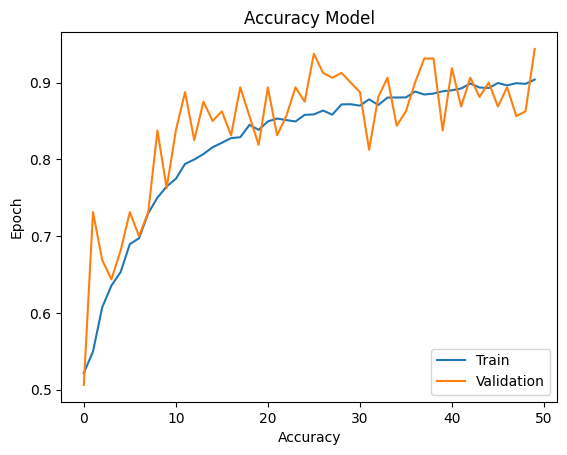

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Accuracy")
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'],loc='lower right')
plt.show()

## Menampilkan Plot Loss

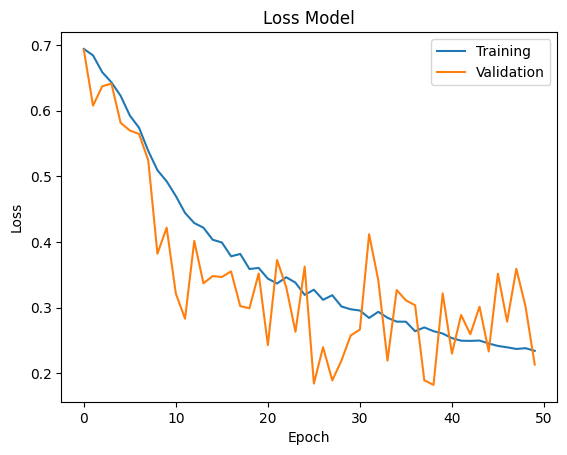

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training','Validation' ],loc='upper right')
plt.show()

## Melakukan Prediksi Gambar

In [ ]:
def upload_image(file_image):
  for fn in file_image.keys():
    path = fn
    img = image.load_img(path, target_size =(150,150))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print("\nGambar:",fn)

    plt.show(img)

    print("\nHasil:")
    if classes[0,0]!=0:
      print('Dog')
    elif classes[0,0]==0:
      print('Cat')
    else:
      print('Bukan Dog atau Cat')

Saving dog-manis.jpeg to dog-manis.jpeg
1/1 [==============================] - 0s 375ms/step

Gambar: dog-manis.jpeg


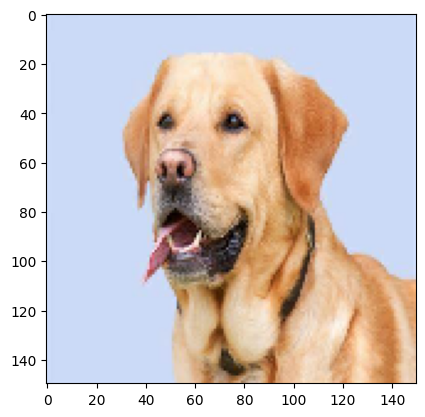


Hasil:
Dog


In [ ]:
uploaded = files.upload()

upload_image(uploaded)

Saving kucing-putih-manis.jpeg to kucing-putih-manis.jpeg
1/1 [==============================] - 0s 20ms/step

Gambar: kucing-putih-manis.jpeg


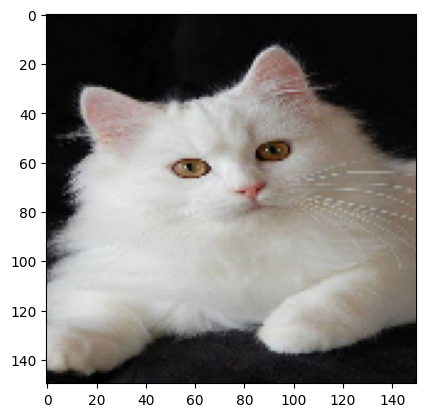


Hasil:
Cat


In [ ]:
uploaded = files.upload()

upload_image(uploaded)

Saving Kucing Lucu.jpg to Kucing Lucu.jpg
1/1 [==============================] - 0s 17ms/step

Gambar: Kucing Lucu.jpg


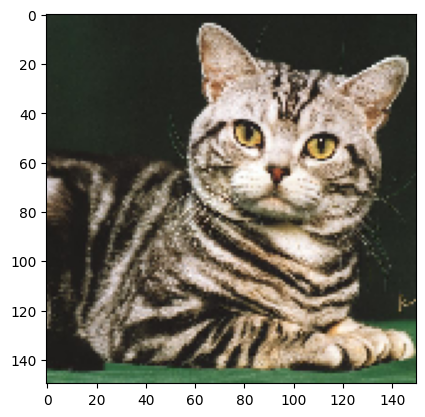


Hasil:
Cat


In [ ]:
uploaded = files.upload()

upload_image(uploaded)

Saving dog-putih-manis.jpg to dog-putih-manis.jpg
1/1 [==============================] - 0s 18ms/step

Gambar: dog-putih-manis.jpg


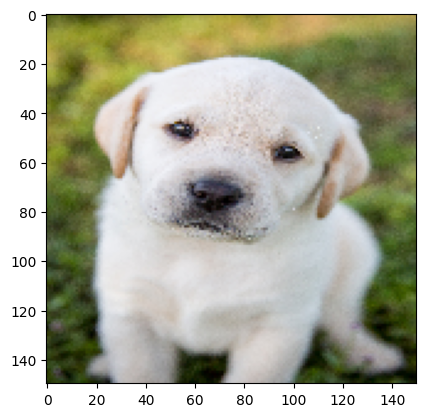


Hasil:
Dog


In [ ]:
uploaded = files.upload()

upload_image(uploaded)